# Postprocessing

The Isoforce data is recorded using three different channels named:

- **P** $\rightarrow \quad \text{Position}$ `AI0`
- **T** $\rightarrow \quad \text{Torque}$ `AI1`
- **S** $\rightarrow \quad \text{Speed}$ `AI2`

During the postprocessing, the global parameter name is used as follows with the corresponding class.

- **P** $\rightarrow \quad \text{Angle}$ `AI0` $\rightarrow$ `IsoforceIso.angle` colored in red (C3)
- **T** $\rightarrow \quad \text{Torque}$ `AI1` $\rightarrow$ `IsoforceIso.torque` colored in blue (C0)
- **S** $\rightarrow \quad \text{Speed}$ `AI2` $\rightarrow$ `IsoforceIso.speed` colored in yellow (C8)

**Set data path**

In [1]:
path = "measurements/Participant_test1/"

## Start postprocessing

- `isoforce_iso` contains the data recorded with the Isoforce
- `isoforce_py_raw` contains the Isoforce data recorded with the Python script
- `sciospec_EIT_raw` contains the EIT data recorded with the EIT device

In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from src.postprocessing import (
    IsoforceIso,
    ProcessingDir,
    process_sciospec_eit,
    renderDF,
    scale_to_range,
)

In [3]:
part_path = ProcessingDir(path)

Fund participant data:

Head directory: self.path='measurements/Participant_test1/'
Raw Isoforce data measured by Isoforce:
	self.isoforce_iso='measurements/Participant_test1/Test_1_JO_raw_data_10012025154959.txt'
Raw Isoforce data measured by Python:
	self.isoforce_py_raw='measurements/Participant_test1/Isokinetic_raw/'
Raw sciospec EIT data:
	self.sciospec_EIT_raw='measurements/Participant_test1/EIT_raw/'
Raw sciospec EIT samples:
	self.EIT_samples_raw='measurements/Participant_test1/EIT_raw/20250113 09.24.18/setup/'
Preprocessed sciospec EIT samples:
	self.s_path_eit='measurements/Participant_test1/EIT_processed/'


In [4]:
DF = renderDF(part_path.isoforce_iso)

!!!The torque data is lowpass filtered!!!
!!!The angle data is lowpass filtered!!!


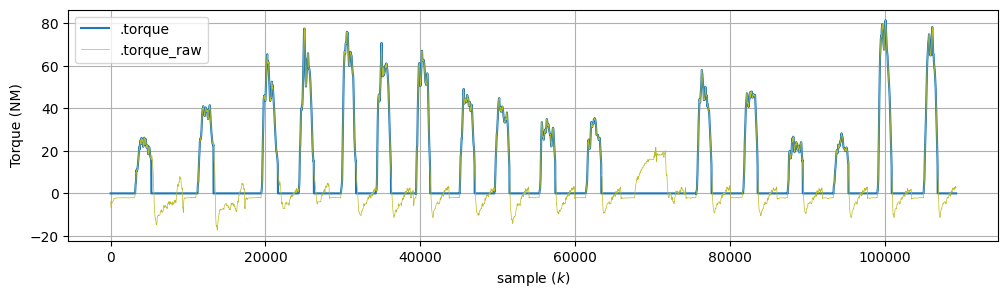

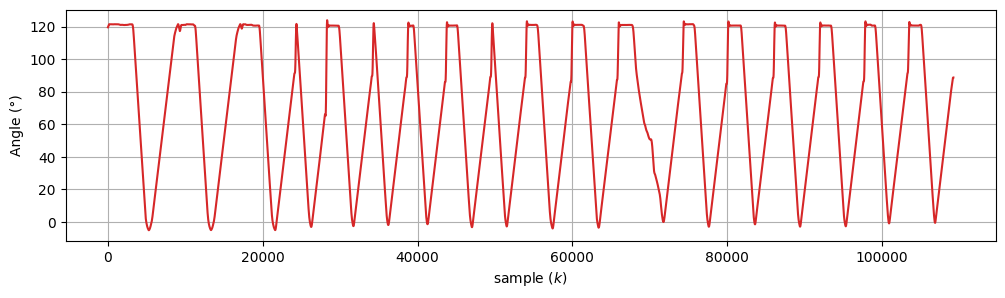

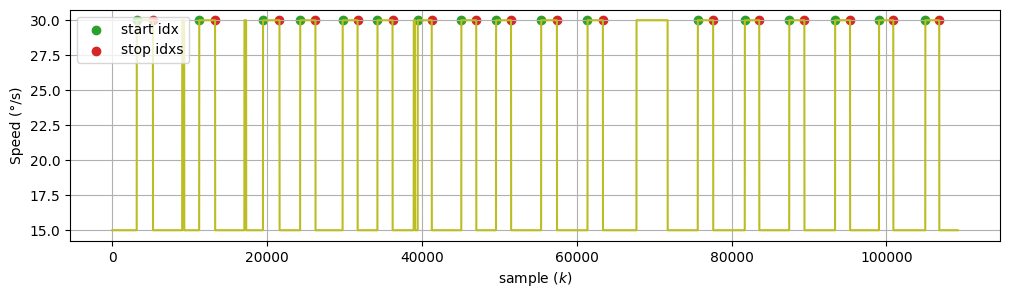

In [5]:
isoforce_iso = IsoforceIso(DF, LP_filter=True)
isoforce_iso.plot_torque()
isoforce_iso.plot_angle()
isoforce_iso.plot_speed()

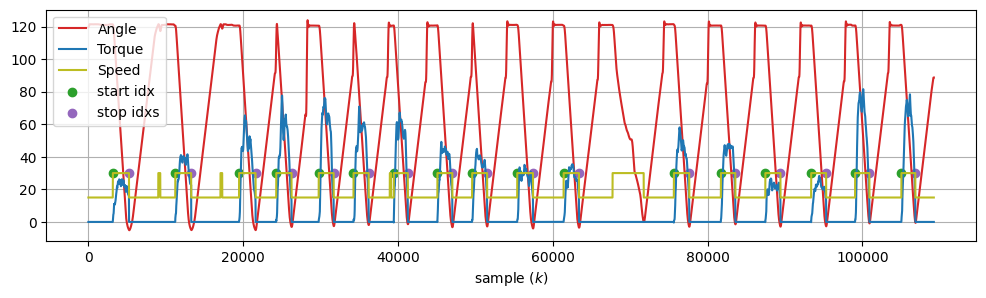

In [6]:
isoforce_iso.plot_data()

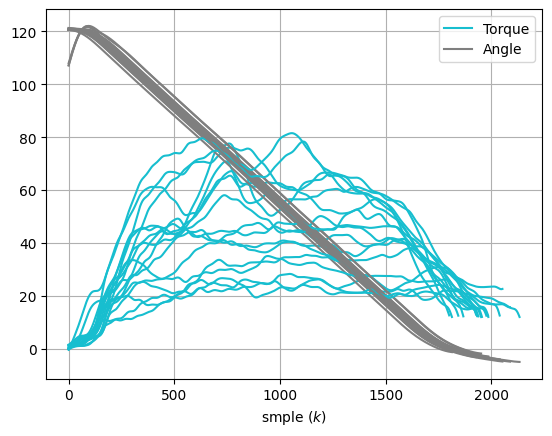

In [7]:
for idx in range(len(isoforce_iso.torque_segments.keys())):
    plt.plot(isoforce_iso.torque_segments[f"T_seg_{idx}"], "C9")
    plt.plot(isoforce_iso.angle_segments[f"A_seg_{idx}"], "C7")
plt.grid()
plt.legend(["Torque", "Angle"])
plt.xlabel("smple ($k$)")
plt.show()

**Isoforce Python raw**

- Ch_1, P = Angle = red (C3) {Factor = 54, Offset = 12}
- Ch_2, T = Torque = blue (C0) {Factor = 150, Offset = 24}
- Ch_3, S = Speed = yellow (C8) {Factor = 108, Offset = -4}

In [8]:
part_path.isoforce_py_raw

'measurements/Participant_test1/Isokinetic_raw/'

In [9]:
from src.postprocessing import IsoforcePy

In [10]:
isoforce_py = IsoforcePy(
    part_path.isoforce_py_raw,
    LP_filter=True,
    over_UTC=False,
    scale_0_1=True,
)

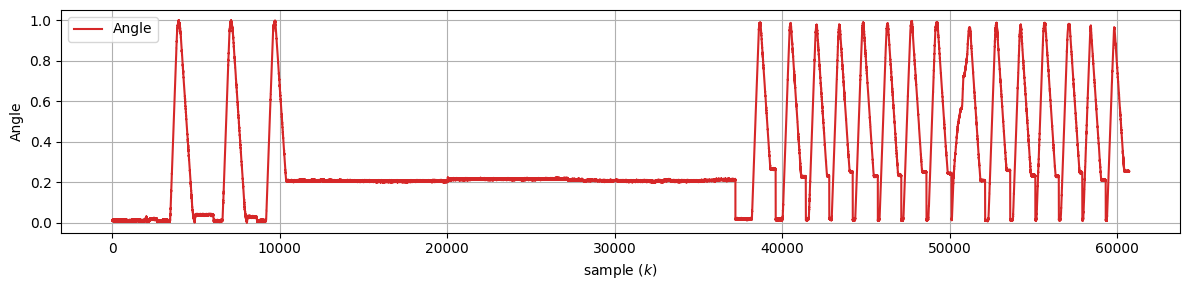

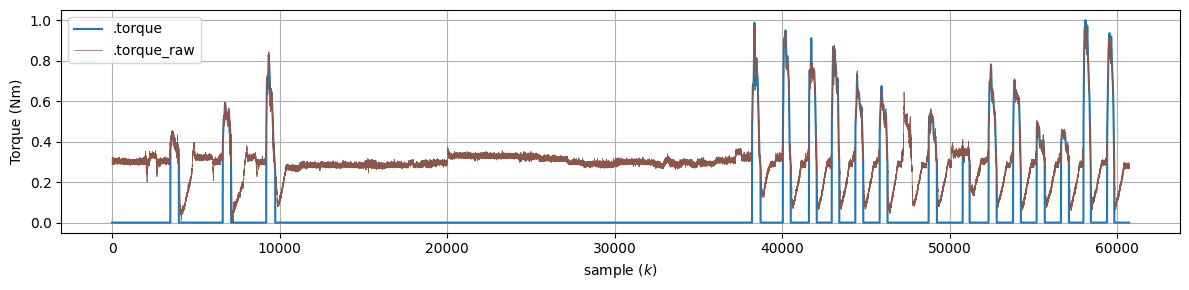

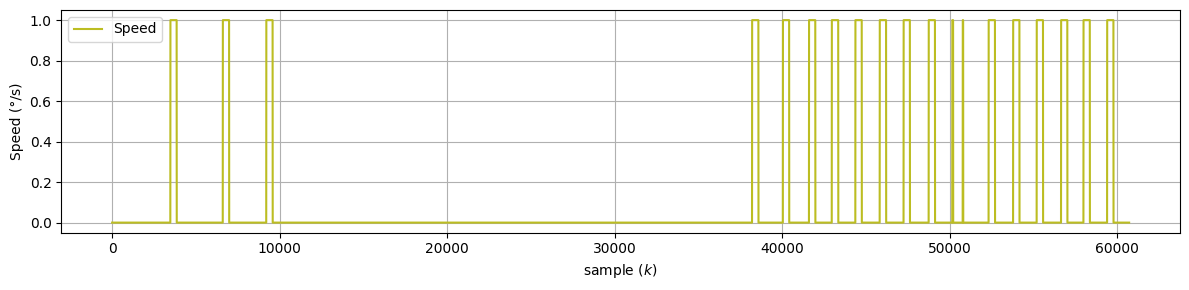

In [11]:
isoforce_py.plot_angle()
isoforce_py.plot_torque()
isoforce_py.plot_speed()

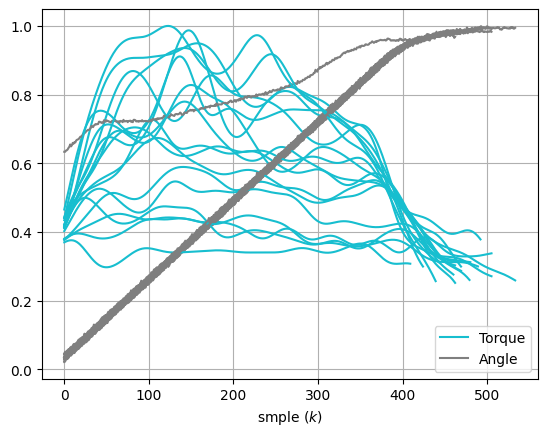

In [12]:
for idx in range(len(isoforce_py.torque_segments.keys())):
    plt.plot(isoforce_py.torque_segments[f"T_seg_{idx}"], "C9")
    plt.plot(isoforce_py.angle_segments[f"A_seg_{idx}"], "C7")
plt.grid()
plt.legend(["Torque", "Angle"])
plt.xlabel("smple ($k$)")
plt.show()

**Sync `isoforce_iso` with `isoforce_py`**

In [13]:
len(isoforce_iso.torque_segments.keys()), len(isoforce_py.torque_segments.keys())

(17, 17)

In [14]:
from scipy.signal import resample


def resample_signals(iso_iso, iso_py, target_length=None):
    iso_iso = np.asarray(iso_iso)
    iso_py = np.asarray(iso_py)
    if target_length:
        print(f"Resample both signals to a length of {target_length} samples.")
        iso_py = resample(iso_py, num=target_length)
        iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py
    else:
        target_length = max(len(iso_iso), len(iso_py))
        print(f"Resample both signals to a length of {target_length} samples.")
        if len(iso_iso) > len(iso_py):
            iso_py = resample(iso_py, num=target_length)
        elif len(iso_py) > len(iso_iso):
            iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py


def detect_shift(signal1, signal2):
    N = max(len(signal1), len(signal2))
    corr = np.correlate(signal1, signal2, mode="full")
    lags = np.arange(-N + 1, N)

    max_corr_idx = np.argmax(corr)
    discrete_time_shift = lags[max_corr_idx]
    print(f"Discrete time shift of {discrete_time_shift}.")
    return discrete_time_shift

Resample both signals to a length of 2090 samples.
Discrete time shift of 276.
Resample both signals to a length of 1500 samples.


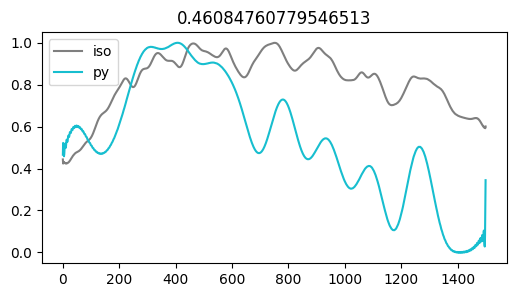

Resample both signals to a length of 2054 samples.
Discrete time shift of 144.
Resample both signals to a length of 1500 samples.


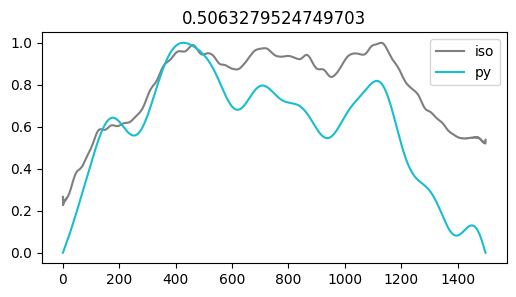

Resample both signals to a length of 2135 samples.
Discrete time shift of 172.
Resample both signals to a length of 1500 samples.


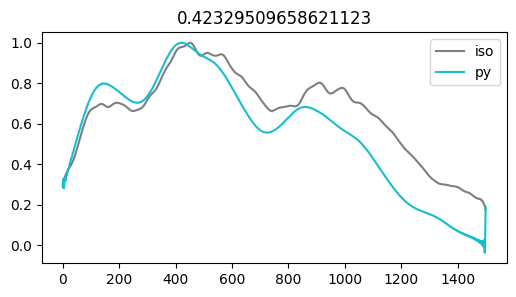

Resample both signals to a length of 1978 samples.
Discrete time shift of 185.
Resample both signals to a length of 1500 samples.


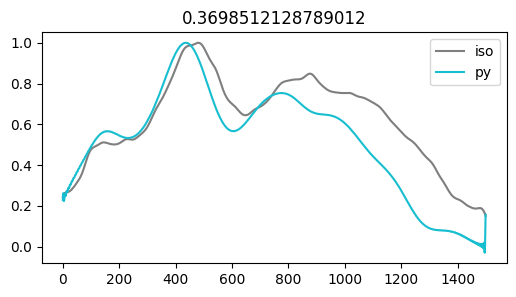

Resample both signals to a length of 1934 samples.
Discrete time shift of 178.
Resample both signals to a length of 1500 samples.


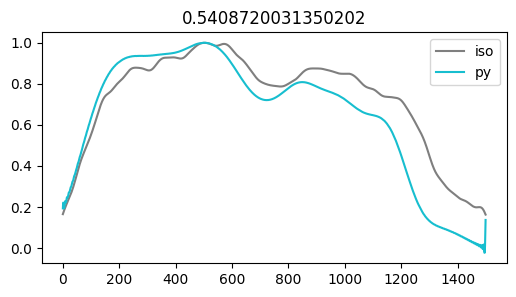

Resample both signals to a length of 1953 samples.
Discrete time shift of 175.
Resample both signals to a length of 1500 samples.


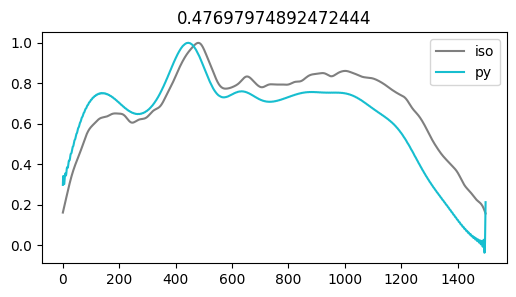

Resample both signals to a length of 1815 samples.
Discrete time shift of 80.
Resample both signals to a length of 1500 samples.


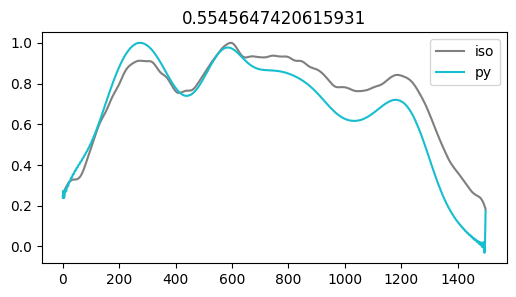

Resample both signals to a length of 1929 samples.
Discrete time shift of 106.
Resample both signals to a length of 1500 samples.


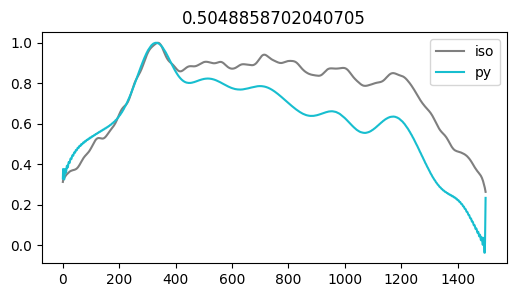

Resample both signals to a length of 1940 samples.
Discrete time shift of 148.
Resample both signals to a length of 1500 samples.


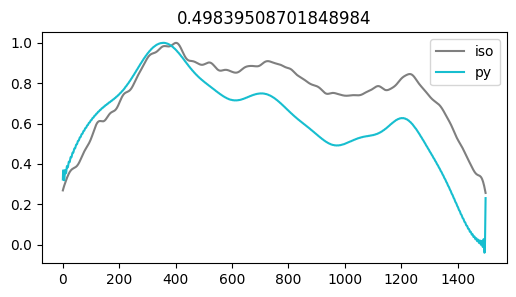

Resample both signals to a length of 2041 samples.
Discrete time shift of 175.
Resample both signals to a length of 1500 samples.


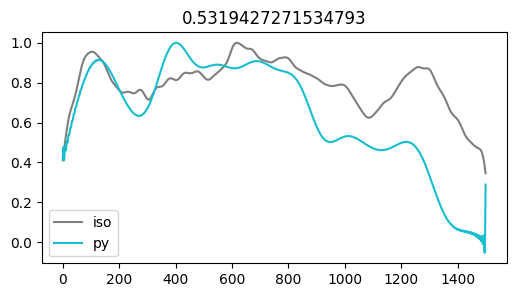

Resample both signals to a length of 1986 samples.
Discrete time shift of 180.
Resample both signals to a length of 1500 samples.


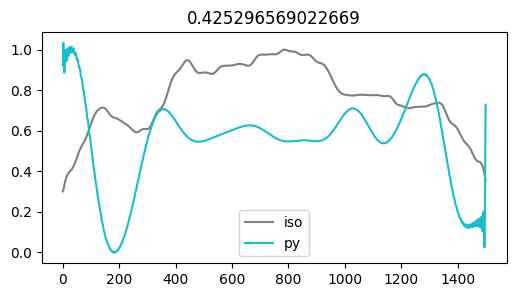

Resample both signals to a length of 1987 samples.
Discrete time shift of 195.
Resample both signals to a length of 1500 samples.


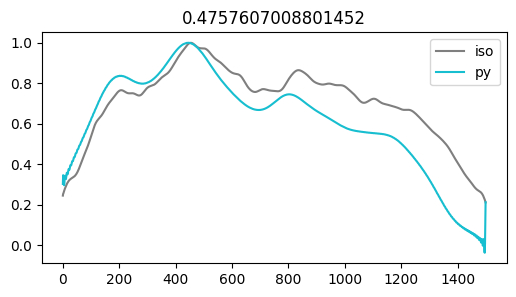

Resample both signals to a length of 1869 samples.
Discrete time shift of 154.
Resample both signals to a length of 1500 samples.


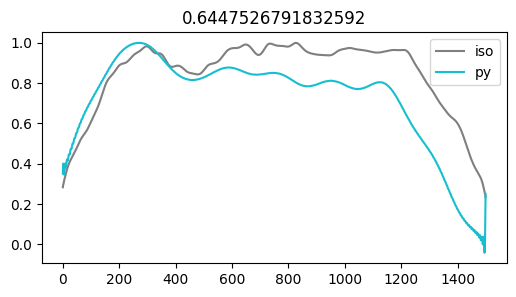

Resample both signals to a length of 1957 samples.
Discrete time shift of 163.
Resample both signals to a length of 1500 samples.


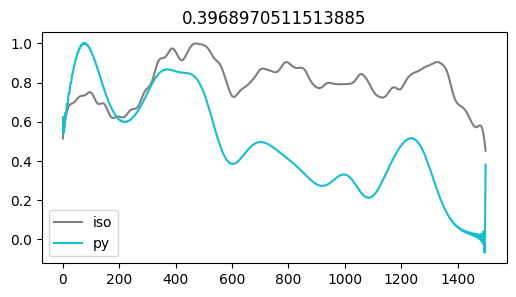

Resample both signals to a length of 1934 samples.
Discrete time shift of 231.
Resample both signals to a length of 1500 samples.


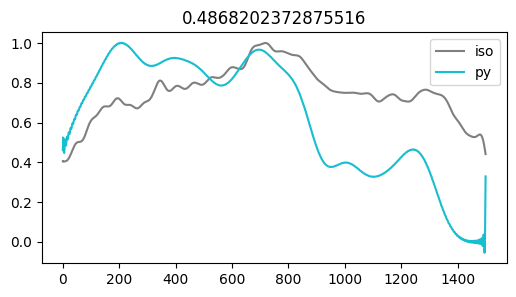

Resample both signals to a length of 1845 samples.
Discrete time shift of 141.
Resample both signals to a length of 1500 samples.


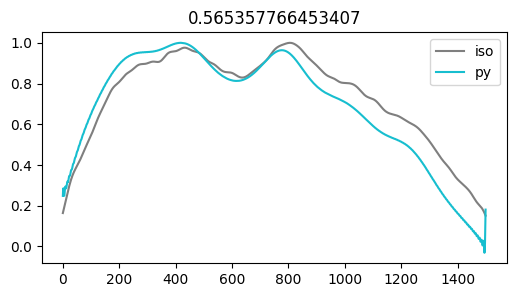

Resample both signals to a length of 1802 samples.
Discrete time shift of 106.
Resample both signals to a length of 1500 samples.


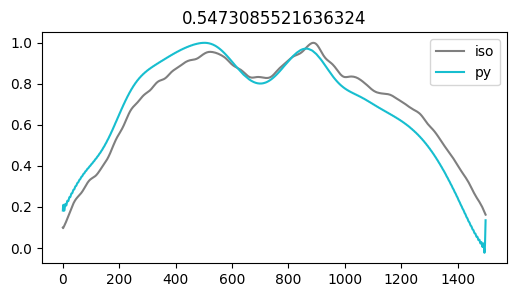

In [15]:
for idx in range(
    min(
        len(isoforce_iso.torque_segments.keys()),
        len(isoforce_py.torque_segments.keys()),
    )
):
    # scale the amplitude rage to [0,1].
    iso_seg = scale_to_range(isoforce_iso.torque_segments[f"T_seg_{idx}"])
    py_seg = scale_to_range(isoforce_py.torque_segments[f"T_seg_{idx}"])
    # create two signals of same length and compute the phase shift.
    iso_seg_corr, py_seg_corr = resample_signals(iso_seg, py_seg)
    shift = detect_shift(iso_seg_corr, py_seg_corr)
    # resample the original, amplitude scaled signals to a constant lenght
    iso_seg, py_seg = resample_signals(iso_seg[shift:], py_seg, target_length=1500)

    plt.figure(figsize=(6, 3))
    plt.title(np.correlate(iso_seg, py_seg)[0] / len(iso_seg))
    # plt.show()
    plt.plot(iso_seg, "C7", label="iso")
    plt.plot(py_seg, "C9", label="py")
    plt.legend()
    plt.show()

In [16]:
for start, stop in zip(isoforce_py.start_idxs, isoforce_py.stop_idxs):
    print("from", isoforce_py.time[start], "to", isoforce_py.time[stop])
    print("Δt", isoforce_py.time[stop] - isoforce_py.time[start])

from 2025-01-13 09:24:39.730000 to 2025-01-13 09:24:44.790000
Δt 0:00:05.060000
from 2025-01-13 09:25:11.020000 to 2025-01-13 09:25:15.950000
Δt 0:00:04.930000
from 2025-01-13 09:25:36.970000 to 2025-01-13 09:25:42.310000
Δt 0:00:05.340000
from 2025-01-13 09:30:59.910000 to 2025-01-13 09:31:04.970000
Δt 0:00:05.060000
from 2025-01-13 09:31:49.300000 to 2025-01-13 09:31:54
Δt 0:00:04.700000
from 2025-01-13 09:32:37.880000 to 2025-01-13 09:32:42.490000
Δt 0:00:04.610000
from 2025-01-13 09:33:25.490000 to 2025-01-13 09:33:29.940000
Δt 0:00:04.450000
from 2025-01-13 09:34:14.560000 to 2025-01-13 09:34:19.260000
Δt 0:00:04.700000
from 2025-01-13 09:34:59.090000 to 2025-01-13 09:35:03.720000
Δt 0:00:04.630000
from 2025-01-13 09:36:39.320000 to 2025-01-13 09:36:44.220000
Δt 0:00:04.900000
from 2025-01-13 09:37:40.630000 to 2025-01-13 09:37:44.730000
Δt 0:00:04.100000
from 2025-01-13 09:39:15.090000 to 2025-01-13 09:39:19.890000
Δt 0:00:04.800000
from 2025-01-13 09:40:01.710000 to 2025-01-13 0

**EIT Sciospec raw**

In [17]:
part_path.print_info()

Fund participant data:

Head directory: self.path='measurements/Participant_test1/'
Raw Isoforce data measured by Isoforce:
	self.isoforce_iso='measurements/Participant_test1/Test_1_JO_raw_data_10012025154959.txt'
Raw Isoforce data measured by Python:
	self.isoforce_py_raw='measurements/Participant_test1/Isokinetic_raw/'
Raw sciospec EIT data:
	self.sciospec_EIT_raw='measurements/Participant_test1/EIT_raw/'
Raw sciospec EIT samples:
	self.EIT_samples_raw='measurements/Participant_test1/EIT_raw/20250113 09.24.18/setup/'
Preprocessed sciospec EIT samples:
	self.s_path_eit='measurements/Participant_test1/EIT_processed/'


In [18]:
try:
    os.mkdir(part_path.s_path_eit)
    process_sciospec_eit(part_path)
except BaseException:
    print("Directory already exists.")

Directory already exists.


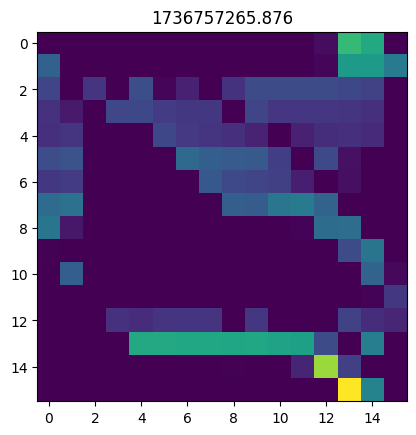

In [19]:
tmp = np.load(part_path.s_path_eit + "setup_00002.npz", allow_pickle=True)
tmp_2 = np.load(part_path.s_path_eit + "setup_00003.npz", allow_pickle=True)
tmp.files

plt.title(tmp["timestamp"])
plt.imshow(np.abs(tmp["eit"]))
plt.show()

In [20]:
times = list()
for ele in np.sort(glob(part_path.s_path_eit + "*.npz")):
    tmp = np.load(ele, allow_pickle=True)
    times.append(tmp["timestamp"])
times = np.array(times)

In [21]:
time_py = [dt.timestamp() for dt in isoforce_py.time]

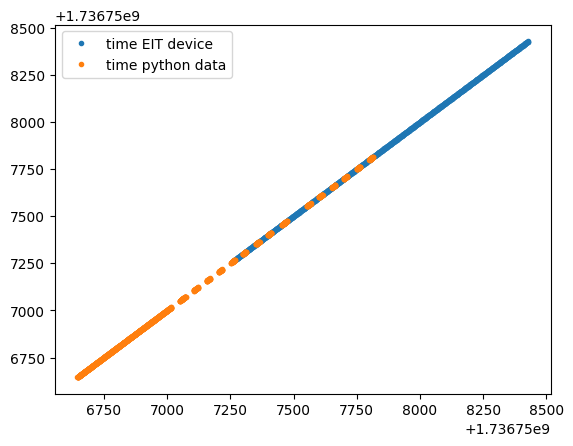

In [22]:
plt.plot(times[::50], times[::50], ".", label="time EIT device")
plt.plot(time_py[::50], time_py[::50], ".", label="time python data")
plt.legend()

In [23]:
print(len(time_py))
print(len(times))

60700
46549


In [24]:
import datetime

dt = datetime.datetime(2025, 1, 13, 9, 24, 5, 130000)
float_timestamp = dt.timestamp()

print(float_timestamp)  # Output: 1736766245.0

1736756645.13


In [25]:
float_timestamp = 1736756645.0003
dt = datetime.datetime.fromtimestamp(float_timestamp)

print(dt)  # Output: 2025-01-13 09:24:05

2025-01-13 09:24:05.000300


In [27]:
datetime.datetime.fromtimestamp(time_py[0])

datetime.datetime(2025, 1, 13, 9, 24, 5)

In [28]:
datetime.datetime.fromtimestamp(time_py[-1])

datetime.datetime(2025, 1, 13, 9, 43, 33, 990000)

In [30]:
print(datetime.datetime.fromtimestamp(times[0]))
print(datetime.datetime.fromtimestamp(times[-1]))

2025-01-13 09:34:25.851000
2025-01-13 09:53:49.490000


**Load eit and color time in PCA**

In [73]:
EIT = list()
for ele in np.sort(glob(part_path.s_path_eit + "*.npz")):
    tmp = np.load(ele, allow_pickle=True)
    EIT.append(tmp["eit"])
EIT = np.asarray(EIT)
EIT = np.abs(EIT)

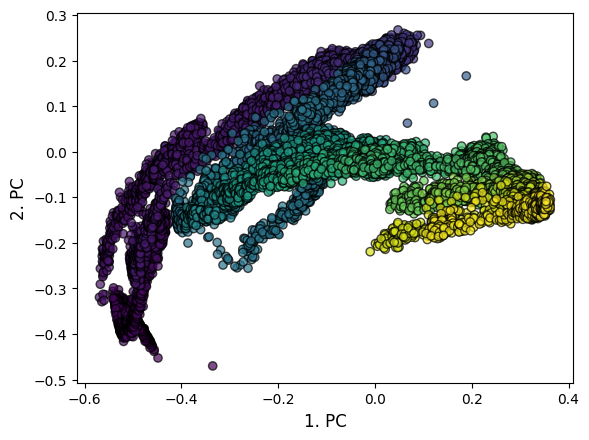

In [74]:
from sklearn.decomposition import PCA

data_flattened = EIT.reshape(EIT.shape[0], -1)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_flattened)

plt.scatter(
    data_reduced[:, 0],
    data_reduced[:, 1],
    c=scale_to_range(times),
    edgecolor="k",
    alpha=0.7,
)
plt.xlabel("1. PC", fontsize=12)
plt.ylabel("2. PC", fontsize=12)
plt.show()